In [ ]:
import numpy as np
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def valueCounts(x):
    unique, counts = np.unique(x, return_counts=True)
    return dict(zip(unique,counts))

In [ ]:
valueCounts(Y_train)

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [ ]:
def getSamples(x, y, amount, category):
    data = []
    label = []
    counter = 0
    for i,j in zip(x, y):
        if(counter==amount):
            break
        else:
            if(j == category):
                data.append(i)
                label.append(j)
                counter+=1
    return data, label

In [ ]:
x_train = []
y_train = []
for i in range(10):
    x,y = getSamples(X_train, Y_train, 1000,i)
    x_train+=x
    y_train+=y
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
valueCounts(y_train)

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [ ]:
x_test = X_test[:1000,:]
y_test = Y_test[:1000]

In [ ]:
print(f"Train's dim {x_train.shape} Train's label dim {y_train.shape}\n Test's dim {x_test.shape} Test's label dim {y_test.shape}")

Train's dim (10000, 28, 28) Train's label dim (10000,)
 Test's dim (1000, 28, 28) Test's label dim (1000,)


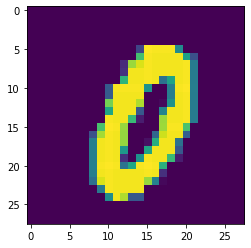

In [ ]:
Img = x_train[2]
plt.imshow(Img)

In [ ]:
def getGrids(img, winRow, winCol):
    grids = []
    imgR, imgC = img.shape
    rowLimitation = imgR-1 #- winRow
    colLimitation = imgC-1 #- winCol

    for r in range(0, rowLimitation, winRow):
        for c in range(0, colLimitation, winCol):
            grid = img[r:r+winRow, c:c+winCol]
            grids.append(grid)
  
    return np.array(grids)

In [ ]:
grids = getGrids(Img, 7, 7)
grids.shape

(16, 7, 7)

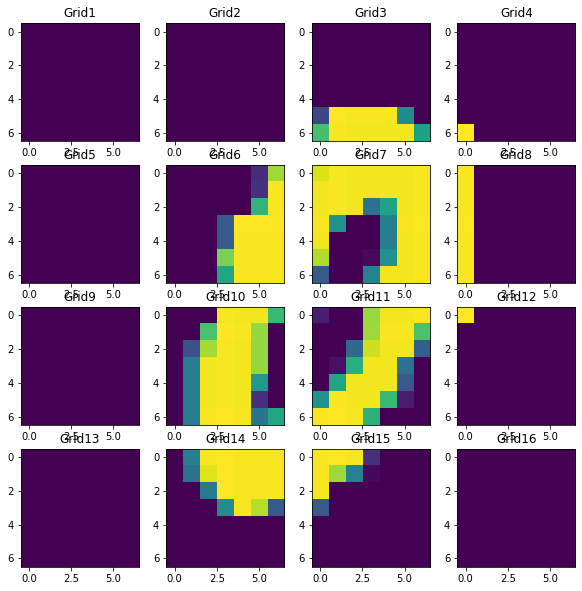

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(10,10))
col = 0
for r, w in enumerate(grids):
    axs[r//4, col].imshow(w)
    axs[r//4, col].set_title(f'Grid{r+1}')
    col+=1
    col = col % 4

In [ ]:
def getFeaVector(grids):
    feaVector = []
    for grid in grids:
        gridR, gridC = grid.shape
        sumPixels = 0
        X = 0
        Y = 0
        for r in range(gridR):
            for c in range(gridC):
                sumPixels+= grid[r][c]
                X+= r * grid[r][c]
                Y+= c * grid[r][c]
        if(sumPixels!=0):
            X/= sumPixels
            Y/= sumPixels
            feaVector.append(X)
            feaVector.append(Y)
        else:
            feaVector.append(0)
            feaVector.append(0)     
    return np.array(feaVector)

In [ ]:
fv = getFeaVector(grids)
fv.shape

(32,)

In [ ]:
fv

array([0.        , 0.        , 0.        , 0.        , 5.57050126,
       2.80887126, 6.        , 0.        , 0.        , 0.        ,
       3.82885906, 4.93803132, 2.44006908, 3.33690271, 3.        ,
       0.        , 0.        , 0.        , 3.08031723, 3.38284066,
       3.03331805, 3.19929696, 0.        , 0.        , 0.        ,
       0.        , 1.24186358, 3.98818547, 0.76591981, 0.77535377,
       0.        , 0.        ])

In [ ]:
def FV(d, winR = 7, winC = 7):
    dGrids = []
    FV = []

    for i in d:
        dGrids.append(getGrids(i, winR, winC))
    for i in dGrids:
        FV.append(getFeaVector(i))
  
    return np.array(FV)

In [ ]:
x_trainFV = FV(x_train)
x_trainFV.shape

(10000, 32)

In [ ]:
x_testFV = FV(x_test)
x_testFV.shape

(1000, 32)

In [ ]:
from sklearn.metrics import mean_squared_error
pred_l = []
def KNN(k, x_testFV, x_trainFV, y_train):
    for i in x_testFV:
        minDist = []
        for j in x_trainFV:
            minDist.append(mean_squared_error(i, j))
        minDist = np.array(minDist)
        row = []
        for j in range(k):
            row.append(y_train[np.argmin(minDist)])
            minDist = np.delete(minDist, np.argmin(minDist))
        pred_l.append(row)
    return pred_l

In [ ]:
def voting(y):
    most_f = []
    for n in y:
        counts = np.bincount(n)
        most_f.append(np.argwhere(counts == np.max(counts))[-1][0])
    most_f = np.array(most_f)
    return most_f

In [ ]:
def accuracy(y_test, y_predicted):
    counter = 0
    for i in range(len(y_test)):
        if y_predicted[i] == y_test[i]:
            counter+=1
    acc = counter / (len(y_test))
    return acc

In [ ]:
y_pred = KNN(1, x_testFV, x_trainFV, y_train)
res = voting(y_pred)
accuracy(y_test, res)

0.849